<a href="https://colab.research.google.com/github/IndraniMandal/New-Revisions/blob/main/Model_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Metrics

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
 #Import accuracy score and balanced accuracy score from model metrics package
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix,  roc_auc_score

##Types of Metrics

<img src = "https://drive.google.com/uc?id=1-wK3vVSzfKhlhiSTFjrNrSXnivwxIkF5" width=700>


## Confusion Matrix

* We can arrange the predictions in a matrix form
* Errors will show up as values outside the major diagonal
 
<img src = "https://drive.google.com/uc?id=13AU00AYyLe6jCPL7kz2K5BieC42D0JJx" width=400>

 

A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

* True positive **(TP)** is a value is correctly predicted to be true
* False positive **(FP)** is a value that is incorrectly predicted to be false. 
* True negatives **(TN)** where a value is correctly predicted negative
* False negatives **(FN)** are incorrectly predicted as negative.

# Accuracy Score
<font size = '5'>
Accuracy = $\frac{TP + TN}{TP + FN + TN + FP} = \frac{TP + TN}{TotalSum}$

# Precision Score

The percentage of true positives out of all predicted positives (true positives + false positives). The ability of a model to find all the relevant cases within a data set. In simpler terms, out of all predicted positives, how many were correctly predicted.

<font size="5">
Precision = $ \frac{TP}{TP+FP}$


The ability of a classification model to identify only the relevant data points. The precision score is mainly used for test cases where accurately identifying true positives is of the utmost importance. For example, in case of fraud detection,

```
Precision = fraud correctly identified / (fraud correctly identified + claims incorrectly labeled as fraud )
```





# Recall Score

The percentage of true positives out of all actual positives (false negatives + true positives). In simpler terms, out of all positive values, how many were predicted correctly. The ability of a model to find all the relevant cases within a data set.

<font size="5">
Recall = $ \frac{TP}{TP+FN}$

For example, an insurance company needs to properly identify if a claimant is committing fraud. If a fraudster is given an insurance claim, it would cost the company more than them denying the claim. 



```
Recall = fraud correctly identified / (fraud correctly identified + claims incorrectly labeled as NOT fraud) 
```



   


# F1 Score

In some situations, we might know we want to maximize either recall or precision at the expense of the other metric. For example, in preliminary disease screening of patients for follow-up examinations, we would probably want a recall near 1.0—we want to find all patients who actually have the disease—and we can accept a low precision - we accidentally find some patients have the disease who actually don’t have it - if the cost of the follow-up examination isn’t high. However, in cases where we want to find an optimal blend of precision and recall, we can combine the two metrics using the F1 score.

The F1 score is the harmonic mean of precision and recall, taking both metrics into account in the following equation:

<font size="5">  
F1 Score = $\frac{2}{\frac{1}{Precision}+\frac{1}{Recall}} = \frac{2*(Precision*Recall)}{(Precision+Recall)}$

Balanced between recall and precision. Mainly used in imbalanced sets, i.e. when one target variable appears drastically more often than another.

##  Prevalence
It is the fraction of positives in the polulation.

Prevalence = $\frac{P}{P+N}$ = $\frac{TP + FN}{TP+FN+TN+FP}$

The proportion of a population who have a specific characteristic in a given time period.
An example: the prevalence of Alzheimer’s disease in people aged 75-84 is greater than the prevalence of the disease in people aged 85+ (47% vs. 36%)


##Sensitivity and Specificity


True positive rate

Sensitivity = $\frac{TP}{P}$ = $\frac{TP}{TP + FN}$


Specificity indicates what percentage of those who do not have the condition have a negative result on the test. 
This tells us how often the model is correct when it produces a negative result.

True negative rate

Specificity = $\frac{TN}{N}$ = $\frac{TN}{TN + FP}$

`= Number of true negatives/Totoal number of well individual in a population`

Example: Probability of a negative test given that the patient is well.



##Balanced Accuracy

Balanced accuracy is a better metric to use with imbalanced data. It accounts for both the positive and negative outcome classes and doesn’t mislead with imbalanced data.


Balanced Accuracy = $\frac{1}{2}$ $({\frac{TP}{P} + \frac{TN}{N}})$
= $\frac{1}{2}$ $({\frac{TP}{TP+FN} + \frac{TN}{TN+FP}})$

= $\frac {Sensitivity + Specificity} {2}$



##ROC-AUC score
Receiver Operating Characteristic Curve (ROC AUC) curve is a performance measurement for the classification problems at various threshold settings. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

<img src = "https://drive.google.com/uc?id=1caGSSaY1SKfjOFtGFr3VSaQocoiTlJIP" width=400>

## Building a model using the fraud dataset

###Load Fraud data

Kaggle Dataset: [Vehicle Insurance Fraud Detection](https://www.kaggle.com/datasets/khusheekapoor/vehicle-insurance-fraud-detection)

The dataset is an automobile insurance dataset “carclaims”, which is publically available and is provided by Angoss Knowledge Seeker. It has 15420 samples, of which 14497 are legitimate and 923 fraudulent, which indicates high class imbalance.

Dataset cleanup: [Fraud Dataset Cleanup](https://colab.research.google.com/drive/1A7oDyAAbyoEbmQaXgjNG3xDDON2nTOrg?usp=sharing)

The dataset has 32 features in a total of which 6 are ordinal, 25 are categorical, and finally, the class variable that contains the label – “fraud” or “not-fraud”. It consists of 15,420 records of which only 6% (923 records) are fraudulent.

In [ ]:
fraud = pd.read_csv("https://raw.githubusercontent.com/dpereztorres/2023WinterInternship/main/cleanFraud.csv")
fraud.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,11,5,3,0,0,2,0,1,1,0,...,3,0,0,0,0,2,2,1994,0,No
1,0,3,3,0,0,1,0,4,0,0,...,4,1,0,0,0,0,0,1994,1,No
2,9,5,5,0,0,4,10,2,0,1,...,6,0,0,0,0,0,0,1994,1,No
3,5,2,6,1,1,5,6,1,0,1,...,7,1,0,0,3,0,0,1994,0,No
4,0,5,1,0,0,2,1,2,1,0,...,4,0,0,0,0,0,0,1994,1,No


In [ ]:
features  = fraud.drop(['FraudFound'],axis=1)
target = fraud['FraudFound']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(features,target,train_size=0.7, test_size=0.3,random_state=2)

In [ ]:
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=100, random_state= 1 )
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

[Ellipsis]

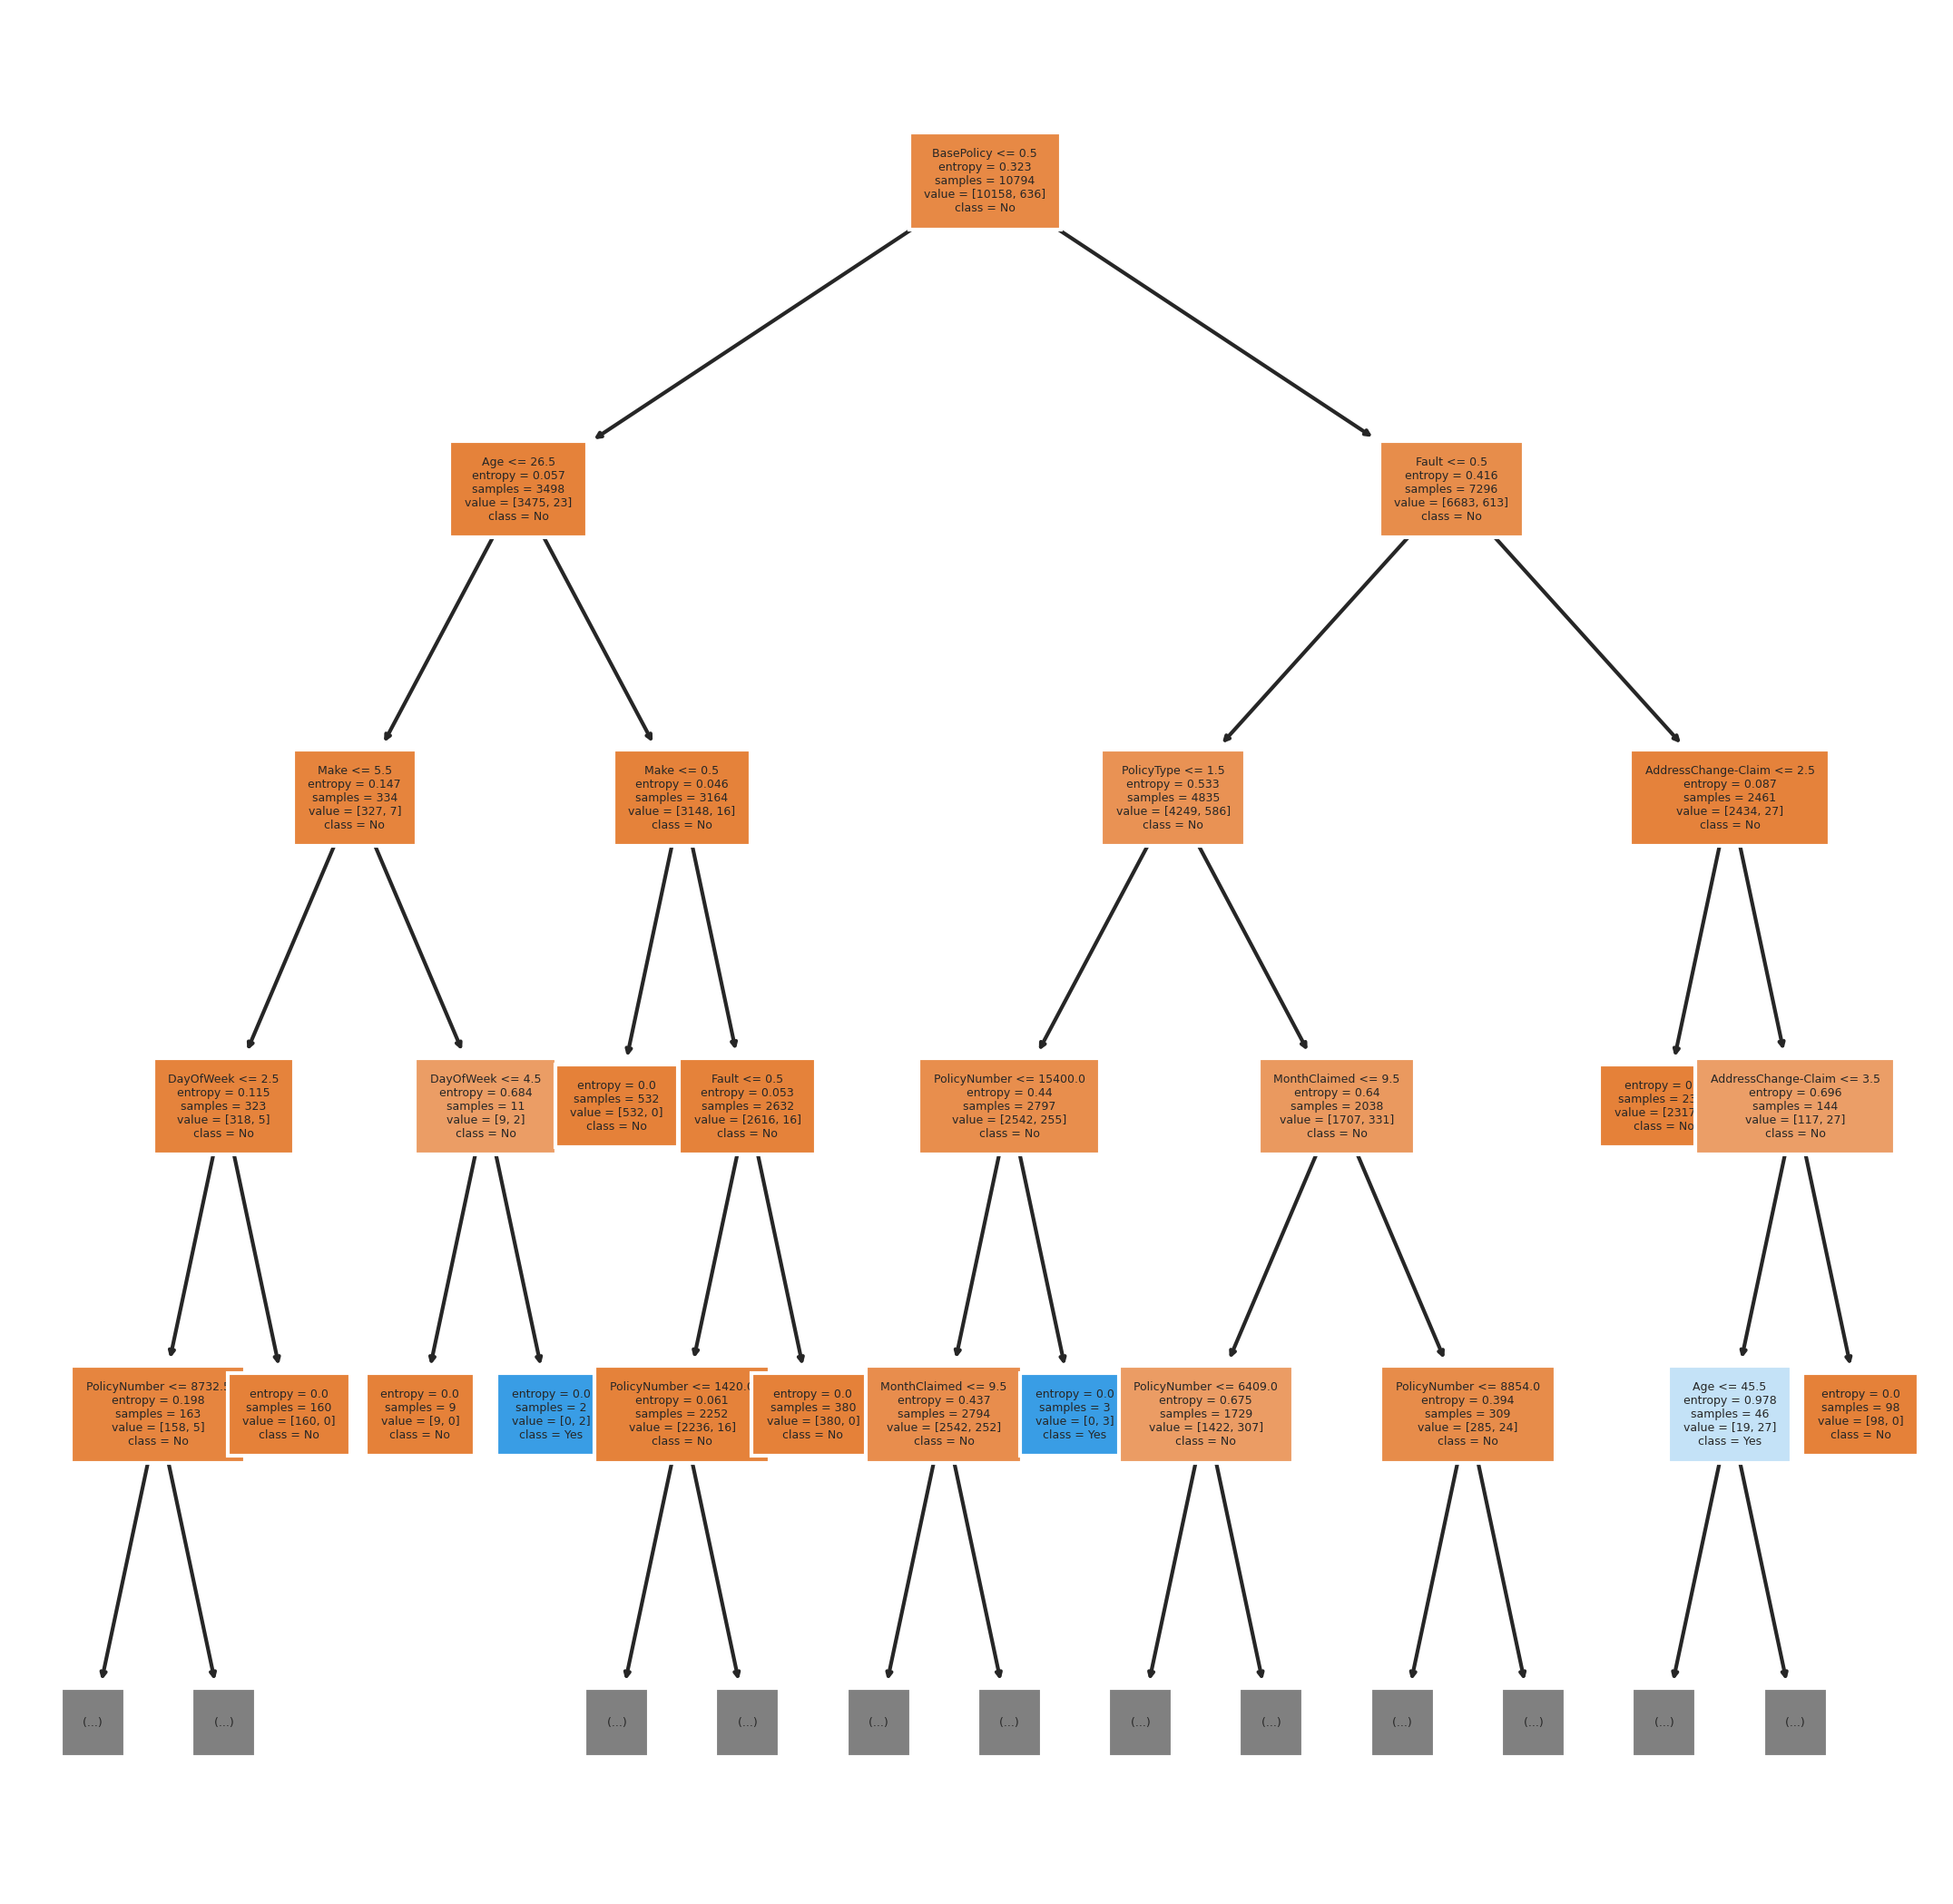

In [ ]:
import matplotlib.pyplot as plt #importing pyplot class from the matplotlib library
from sklearn.tree import plot_tree #importing the plot_tree function from 
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=300) #creating a subplot grid
plot_tree(model, fontsize=3, filled=True, #creating a plot of the tree
               max_depth=4,
               feature_names= features.columns,
               class_names= target.unique())
[...]

We see very few cases are actually fradulent claims compared to non-fradulent claims. 

###Model performance

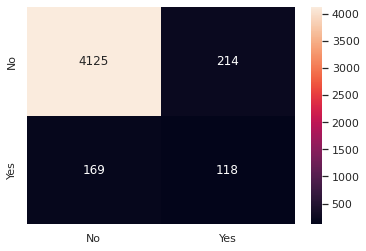

In [ ]:
# build and print the confusion matr
labels= list(target.unique())
cm = confusion_matrix(y_test, pred_test, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
f = sns.heatmap(cm_df, annot=True, fmt='d')

Confusion Matrix for the fraud dataset, where there are:

* 4125 true negatives or non-fradulent claims.

* 214 false positives or non-fradulent claims that were misclassified as fradulent claims.

* 118 true positives or fradulent claims.

* 169 false negatives or true fradulent claims that were. misclassified as non-fraulent claims.

This dataset is unbalanced, heavily favoring non-fradulent claims.

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_test).ravel()
tn, fp, fn, tp

(4125, 214, 169, 118)

In [ ]:
acc=  (tn+ tp)/( tn+ fp+ fn+ tp)
acc

0.9172070903588413

####Accuracy and Balanced accuracy

In [ ]:
print("Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test)))

Accuracy: 0.92


In [ ]:
bal_acc=  (tn/ (tn+ fp)  + tp/(fn+ tp))/2
bal_acc

0.6809148529703452

In [ ]:
print("Balanced Accuracy: {:3.2f}".format(balanced_accuracy_score(y_test, pred_test)))

Balanced Accuracy: 0.68


Notice that the balanced accuracy fell as the model fails to correctly classify the true fraud claims. 

####Precision and Recall
We are interested in the recall score of those fraud cases that were correctly classified. The fraud cases are few and we only care about the positive(fraud) cases and don't care about the negative cases. 

In [ ]:
recall = tp / (tp + fn)
recall

0.41114982578397213

Our model has a recall of 0.41—in other words, it correctly identifies 41% of all fraud claims

In [ ]:
print("Recall: {:3.2f}".format(recall_score(y_test, pred_test, average='binary', pos_label='Yes')))

Recall: 0.41


Recall is very used when you have to correctly classify some event that has already occurred. In this example of fraud detection, models must have a high recall in order to detect frauds properly. In such situations, we don’t care about the real 0s, because we are interested only in spotting the real 1s as often as possible. So, we’re working with the second row of the confusion matrix.

Common uses of recall are, as said, fraud detection models or even disease detection on a patient. If somebody is ill, we need to spot their illness avoiding the false negatives. A false negative patient may become contagious and it’s not safe. That’s why, when we have to spot an event that already occurred, we need to work with recall.

In [ ]:
precision = tp / (tp + fp)
precision

0.35542168674698793

In [ ]:
print("Precision: {:3.2f}".format(precision_score(y_test, pred_test, average='binary', pos_label='Yes')))

Precision: 0.36


Our model has a precision of 0.36—in other words, when it predicts a claim is a fraud, it is correct 36% of the time.

We see that the recall and precision score for this dataset is very low. Hence most the true fraud cases are being misclassified as non-fraud cases. We want these **recall score** to be as high as possible to prevent the company from approving fraud claims. 

## Building a model using the heart attack dataset

##Load heart attack data

Kaggle Dataset: [Heart Attack Analysis & Prediction Dataset](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download)

In [52]:
heart = pd.read_csv("https://raw.githubusercontent.com/dpereztorres/2023WinterInternship/main/heart.csv")
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
X_heart  = heart.drop(['output'],axis=1)
y_heart = heart['output']

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X_heart,y_heart,train_size=0.7, test_size=0.3,random_state=2)

In [55]:
model = tree.DecisionTreeClassifier(criterion='entropy', random_state=2)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

[Ellipsis]

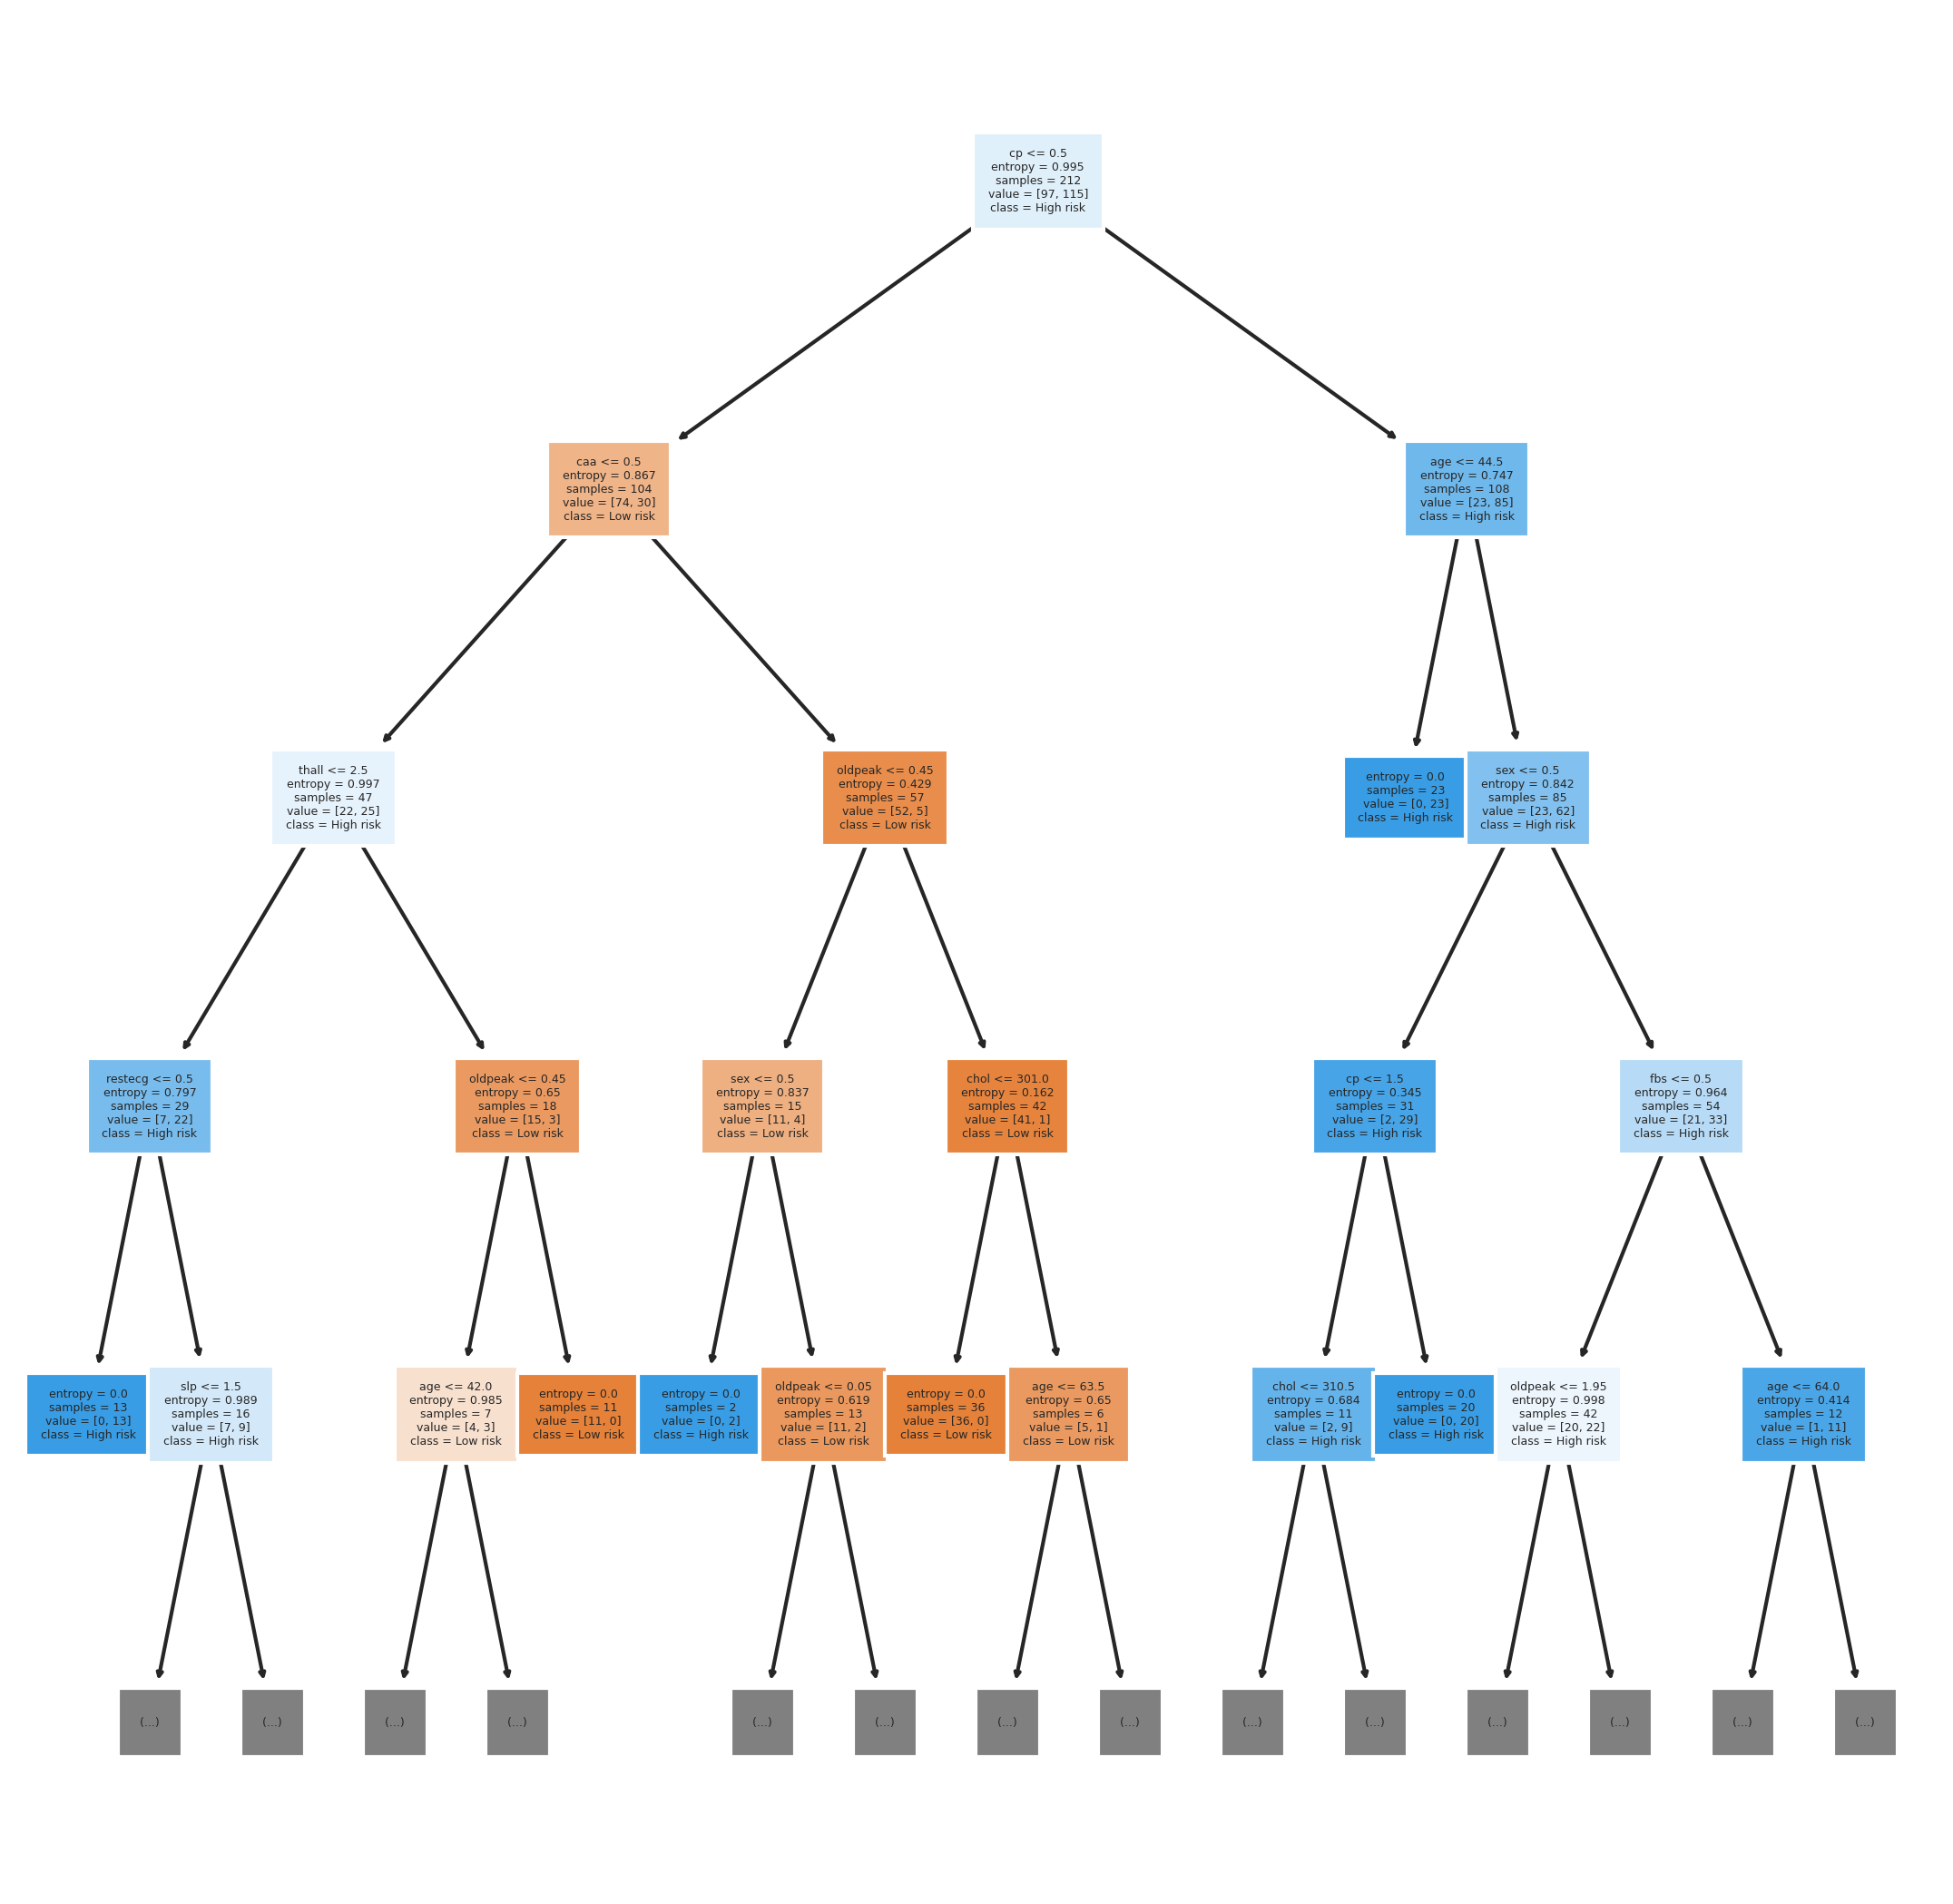

In [56]:
import matplotlib.pyplot as plt #importing pyplot class from the matplotlib library
from sklearn.tree import plot_tree #importing the plot_tree function from 
fig, axes = plt.subplots(1, 1, figsize=(9, 9), dpi=300) #creating a subplot grid
plot_tree(model, fontsize=3, filled=True, max_depth=4,feature_names= X_heart.columns,
          class_names= [ 'Low risk', 'High risk'])
[...]

Confusion Matrix for the Heart Attack dataset, where there are:

31 true negatives

10 false negatives

44 true positives

6 false positives

This dataset is seemingly balanced.

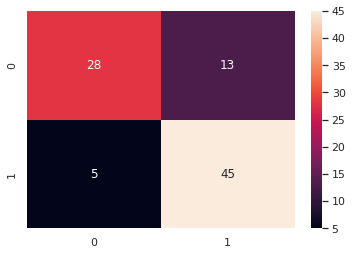

In [57]:
cm = confusion_matrix(y_test, pred_test)
f = sns.heatmap(cm, annot=True, fmt='d')

In [58]:
tn, fp, fn, tp = confusion_matrix(y_test, pred_test).ravel()
tn, fp, fn, tp

(28, 13, 5, 45)

####Precision Recall score
In this case the recall score is very good so the model does a good job of correctly predicting all those cases that are ar a **High-risk** for heart attack.


Precision = $\frac{TP}{TP+FP} $

In [59]:
tp/(tp+fp)

0.7758620689655172

In [60]:
print("Precision: {:3.2f}".format(precision_score(y_test, pred_test, average='binary', pos_label=1)))

Precision: 0.78


Recall = $\frac{TP}{TP+FN} $

In [62]:
tp/(tp+fn)

0.9

In [63]:
print("Recall: {:3.2f}".format(recall_score(y_test, pred_test, average='binary', pos_label=1)))

Recall: 0.90


####Accuracy scores

In [64]:
print("Accuracy Score: {:3.2f}".format(accuracy_score(y_test, pred_test)))

Accuracy Score: 0.80


In [65]:
from sklearn.metrics import balanced_accuracy_score
print("Balanced Accuracy: {:3.2f}".format(balanced_accuracy_score(y_test, pred_test)))

Balanced Accuracy: 0.79


####ROC-AUC score

In [67]:
roc_auc_score(y_test, pred_test, average = None)

0.7914634146341463

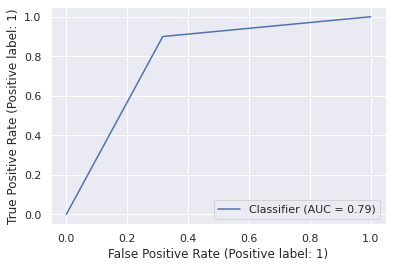

In [68]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, pred_test)
plt.show()

The Higher the AUC, the better the model is at distinguishing between patients at High risk and Low risk.

##Resources


For more examples of when to use either accuracy score: [Precision-Recall Tradeoff in Real-World Use Cases
](https://medium.com/analytics-vidhya/precision-recall-tradeoff-for-real-world-use-cases-c6de4fabbcd0)

[Precision Recall](https://developers.google.com/machine-learning/crash-course/classification/precision-and-recall)